Spotify is a music streaming platform that allows users to access and listen to millions of songs from various genres online. Here are some points that can be used to create a description of the Spotify music application:

- Unlimited Music Playback
- Millions of Songs and Artists
- Personalized Playlists and Recommendations
- Podcasts and Other Audio Content
- Various Playback Modes
- Social Integration
- Access Across Multiple Devices
- Premium Subscription Service

With these features, Spotify has become one of the most popular music streaming platforms globally, providing users with a rich and personalized music listening experience.

# Objective:

- Analyzing most popular songs in 2023 released in the same year
- How these most popular songs perform on different music platform
- People's preferences of music that makes a song popular

track_name: Name of the song

artist(s)_name: Name of the artist(s) of the song

artist_count: Number of artists contributing to the song

released_year: Year when the song was released

released_month: Month when the song was released

released_day: Day of the month when the song was released

in_spotify_playlists: Number of Spotify playlists the song is included in

in_spotify_charts: Presence and rank of the song on Spotify charts

streams: Total number of streams on Spotify

in_apple_playlists: Number of Apple Music playlists the song is included in

in_apple_charts: Presence and rank of the song on Apple Music charts

in_deezer_playlists: Number of Deezer playlists the song is included in

in_deezer_charts: Presence and rank of the song on Deezer charts

in_shazam_charts: Presence and rank of the song on Shazam charts

bpm: Beats per minute, a measure of song tempo

key: Key of the song

mode: Mode of the song (major or minor)

danceability_%: Percentage indicating how suitable the song is for dancing

valence_%: Positivity of the song's musical content

energy_%: Perceived energy level of the song

acousticness_%: Amount of acoustic sound in the song

instrumentalness_%: Amount of instrumental content in the song

liveness_%: Presence of live performance elements

speechiness_%: Amount of spoken words in the song

# import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import davies_bouldin_score
import numpy as np

In [2]:
spotify = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [3]:
spotify.shape

(953, 24)

# Data Understanding

In [4]:
spotify.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [5]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

# Data Cleaning

In [6]:
def musik_spotify(stream):
    for music in stream.columns:
        if spotify[music].apply(lambda x: isinstance(x, str)).any():
            string_values = spotify[spotify[music].apply(lambda x: isinstance(x, str))][music].unique()
            print(f"\nString values in column {music}:")
            print(string_values)
            print('')

print(musik_spotify(spotify))


String values in column track_name:
['Seven (feat. Latto) (Explicit Ver.)' 'LALA' 'vampire' 'Cruel Summer'
 'WHERE SHE GOES' 'Sprinter' 'Ella Baila Sola' 'Columbia' 'fukumean'
 'La Bebe - Remix' 'un x100to' 'Super Shy' 'Flowers' 'Daylight'
 'As It Was' 'Kill Bill' 'Cupid - Twin Ver.'
 'What Was I Made For? [From The Motion Picture "Barbie"]' 'Classy 101'
 'Like Crazy' 'LADY GAGA'
 'I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From The ' 'I Wanna Be Yours'
 'Peso Pluma: Bzrp Music Sessions, Vol. 55'
 'Popular (with Playboi Carti & Madonna) - The Idol Vol. 1 (Music from the HBO Original Series)'
 'SABOR FRESA' 'Calm Down (with Selena Gomez)' 'MOJABI GHOST' 'Last Night'
 'Dance The Night (From Barbie The Album)' 'Rush' 'TULUM' "Creepin'"
 'Anti-Hero' 'TQG' 'Los del Espacio' 'Frï¿½ï¿½gil (feat. Grupo Front'
 'Blank Space' 'Style' 'TQM' 'El Azul'
 'Sunflower - Spider-Man: Into the Spider-Verse' "I'm Good (Blue)"
 'See You Again' 'Barbie World (with Aqua) [From Barbie The Album]'
 'Angels Like

we found streams there is string value so we have to take out from the colomns

In [7]:
spotify.duplicated().sum()

0

In [8]:
spotify.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [9]:
spotify['in_shazam_charts'].head()

0    826
1    382
2    949
3    548
4    425
Name: in_shazam_charts, dtype: object

In [10]:
spotify['key'].head()

0     B
1    C#
2     F
3     A
4     A
Name: key, dtype: object

In [11]:
spotify['key'] = spotify['key'].fillna('Unknown Key')
spotify['in_shazam_charts'] = spotify['in_shazam_charts'].fillna('0')

# Change Data Types

In [12]:
spotify['released_year'] = spotify['released_year'].astype('object')
spotify['released_month'] = spotify['released_month'].astype('object')   
spotify['released_day'] = spotify['released_day'].astype('object')   

In [13]:
spotify = spotify[spotify['streams'] != 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']
spotify['streams'] = pd.to_numeric(spotify['streams'], errors='coerce').astype('Int64')

C:\Users\rheza\AppData\Local\Temp\ipykernel_6252\398099960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify['streams'] = pd.to_numeric(spotify['streams'], errors='coerce').astype('Int64')


comma is considered as string so I'll replace it with no punctuation.

In [14]:
spotify['in_shazam_charts'] = spotify['in_shazam_charts'].str.replace(',', '')
spotify['in_shazam_charts'] = spotify['in_shazam_charts'].astype('int64')

spotify['in_deezer_playlists'] = spotify['in_deezer_playlists'].str.replace(',', '')
spotify['in_deezer_playlists'] = spotify['in_deezer_playlists'].astype('int64')

C:\Users\rheza\AppData\Local\Temp\ipykernel_6252\3086896930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify['in_shazam_charts'] = spotify['in_shazam_charts'].str.replace(',', '')
C:\Users\rheza\AppData\Local\Temp\ipykernel_6252\3086896930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify['in_shazam_charts'] = spotify['in_shazam_charts'].astype('int64')
C:\Users\rheza\AppData\Local\Temp\ipykernel_6252\3086896930.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

# Check Outlier

In [15]:
# take object variable
numerical_cols = spotify.select_dtypes(exclude='object')
numerical_cols = numerical_cols.loc[:, numerical_cols.columns != 'streams']
numerical_cols

,artist_count,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2,553,147,43,263,45,10,826,125,80,89,83,31,0,8,4
1,1,1474,48,48,126,58,14,382,92,71,61,74,7,0,10,4
2,1,1397,113,94,207,91,14,949,138,51,32,53,17,0,31,6
3,1,7858,100,116,207,125,12,548,170,55,58,72,11,0,11,15
4,1,3133,50,84,133,87,15,425,144,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1,953,0,61,13,37,1,0,144,60,24,39,57,0,8,3
949,1,1180,0,4,0,8,0,0,166,42,7,24,83,1,12,6
950,2,573,0,2,0,7,0,0,92,80,81,67,4,0,8,6
951,3,1320,0,29,26,17,0,0,97,82,67,77,8,0,12,5


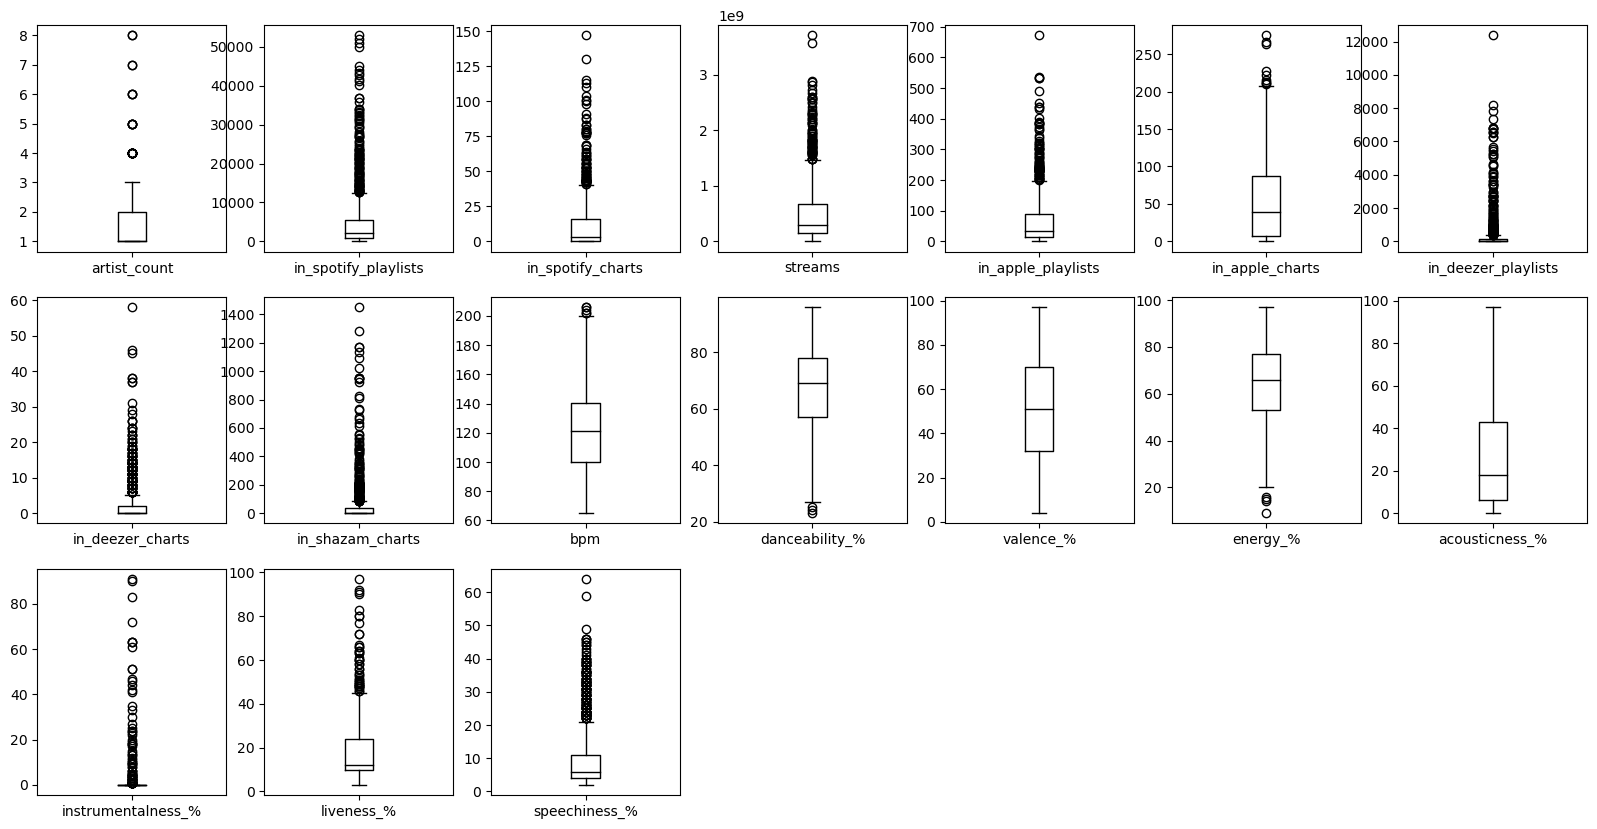

In [16]:
spotify.plot(kind = 'box', subplots = True, layout = (3,7), sharex = False, sharey = False, figsize = (20, 10), color = 'k')
plt.show()

This data has a considerable number of values that deviate significantly from the mean (outliers). However, I will leave them as they are because, in this context, we are discussing music charts. Chart indicators, such as the number of artists, stream count, and chart positions, are all integers without negative values. Additionally, there is a possibility, for instance, that a song is placed in a lower position or experiences a sudden drop in danceability because it might be a slow song, and so on.

# Data Analysis

In [17]:
# Most Streamed songs in 2023 on spotify

top_10_songs = spotify[['artist(s)_name','track_name','streams','in_spotify_charts','in_spotify_playlists','released_month','released_day']].sort_values(by='streams', ascending=False).head(10)
fig = px.bar(top_10_songs, x='streams', y='track_name', color_continuous_scale='viridis')
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()

In [18]:
# Popular song in 2023 released in 2023 on spotify

song_2023 = spotify[spotify['released_year'] == 2023]
rank = song_2023[['artist(s)_name','track_name','streams','in_spotify_charts','in_spotify_playlists','released_month','released_day']].sort_values(by='streams', ascending=False).head(10)
rank

,artist(s)_name,track_name,streams,in_spotify_charts,in_spotify_playlists,released_month,released_day
12,Miley Cyrus,Flowers,1316855716,115,12211,1,12
6,"Eslabon Armado, Peso Pluma",Ella Baila Sola,725980112,50,3090,3,16
133,"Shakira, Bizarrap","Shakira: Bzrp Music Sessions, Vol. 53",721975598,44,5724,1,11
34,"Karol G, Shakira",TQG,618990393,49,4284,2,23
9,"Peso Pluma, Yng Lvcas",La Bebe - Remix,553634067,44,2953,3,17
49,"Ariana Grande, The Weeknd",Die For You - Remix,518745108,47,3408,2,24
10,"Bad Bunny, Grupo Frontera",un x100to,505671438,40,2876,4,17
16,Fifty Fifty,Cupid - Twin Ver.,496795686,77,2942,2,24
160,"Natanael Cano, Peso Pluma",PRC,436027885,26,961,1,23
131,NewJeans,OMG,430977451,27,1783,1,2


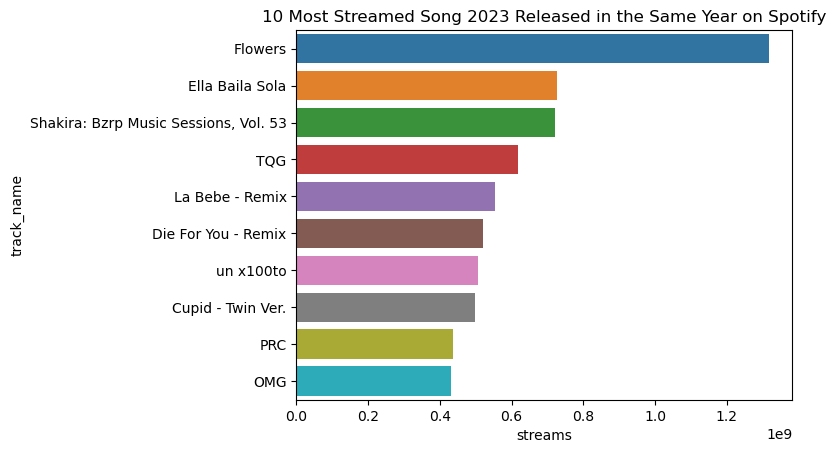

In [19]:
sns.barplot(y='track_name', x='streams',data=rank)
plt.title('10 Most Streamed Song 2023 Released in the Same Year on Spotify')
plt.show()

# How those popular songs perform on different platform ?

## 1) Spotify Chart

In [20]:
top_10_song_2023_chart = song_2023[['artist(s)_name','track_name','streams','in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']].sort_values(by='streams', ascending=False).head(10)
top_10_song_2023_chart

,artist(s)_name,track_name,streams,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts
12,Miley Cyrus,Flowers,1316855716,115,215,58,1021
6,"Eslabon Armado, Peso Pluma",Ella Baila Sola,725980112,50,222,13,418
133,"Shakira, Bizarrap","Shakira: Bzrp Music Sessions, Vol. 53",721975598,44,108,29,22
34,"Karol G, Shakira",TQG,618990393,49,123,18,354
9,"Peso Pluma, Yng Lvcas",La Bebe - Remix,553634067,44,110,13,339
49,"Ariana Grande, The Weeknd",Die For You - Remix,518745108,47,86,1,16
10,"Bad Bunny, Grupo Frontera",un x100to,505671438,40,205,12,251
16,Fifty Fifty,Cupid - Twin Ver.,496795686,77,212,6,0
160,"Natanael Cano, Peso Pluma",PRC,436027885,26,143,6,15
131,NewJeans,OMG,430977451,27,124,1,22


In [21]:
top_10_song_2023_chart = song_2023[['artist(s)_name','track_name','streams','in_spotify_charts', 'in_spotify_playlists','released_year','released_month','released_day']].sort_values(by='streams', ascending=False).head(10)
top_10_song_2023_chart

,artist(s)_name,track_name,streams,in_spotify_charts,in_spotify_playlists,released_year,released_month,released_day
12,Miley Cyrus,Flowers,1316855716,115,12211,2023,1,12
6,"Eslabon Armado, Peso Pluma",Ella Baila Sola,725980112,50,3090,2023,3,16
133,"Shakira, Bizarrap","Shakira: Bzrp Music Sessions, Vol. 53",721975598,44,5724,2023,1,11
34,"Karol G, Shakira",TQG,618990393,49,4284,2023,2,23
9,"Peso Pluma, Yng Lvcas",La Bebe - Remix,553634067,44,2953,2023,3,17
49,"Ariana Grande, The Weeknd",Die For You - Remix,518745108,47,3408,2023,2,24
10,"Bad Bunny, Grupo Frontera",un x100to,505671438,40,2876,2023,4,17
16,Fifty Fifty,Cupid - Twin Ver.,496795686,77,2942,2023,2,24
160,"Natanael Cano, Peso Pluma",PRC,436027885,26,961,2023,1,23
131,NewJeans,OMG,430977451,27,1783,2023,1,2


In [22]:
song_2023[['streams','in_spotify_playlists','in_spotify_charts']].corr()

,streams,in_spotify_playlists,in_spotify_charts
streams,1.000000,0.789136,0.394937
in_spotify_playlists,0.789136,1.000000,0.497372
in_spotify_charts,0.394937,0.497372,1.000000


Streams and Spotify chart have a relationship, but it's not very strong.

This can be observed in the song "Flowers," which has over a billion streams but still lags behind NewJeans' "OMG," with only 430 million streams, in terms of chart ranking. Although both songs were released in the same month, "Flowers" outperforms "OMG" in Spotify playlists.

Considerations:

1. If we look at the correlation between 'streams' and 'in_spotify_chart' (0.394937), even though it indicates a positive but weak relationship, it provides information that an increase in the number of streams is accompanied by a rise in chart ranking. However, the relationship between these two variables is not very strong.

2. Furthermore, the correlation between 'streams' and 'in_spotify_playlist' (0.789136) is strong. This information suggests that an increase in song streams has a strong tendency to be associated with an increase in playlist inclusion.

3. The correlation between 'in_spotify_playlist' and 'in_spotify_charts' (0.497372) shows a moderate positive correlation. This indicates that songs included in more playlists are more likely to have a higher chart ranking, but once again, the relationship is not extremely strong.

Insights:

1. The strong correlation between streams and in_spotify_playlist establishes a clear relationship: if a song has a high number of streams, it is highly likely to be included in playlists. This is a common trend, as popular songs are often added to playlists, further boosting their number of streams.

2. Besides just stream numbers, other factors can influence chart performance, such as changes in stream numbers, unique listener counts, engagement, and competition with other songs.

In conclusion, while there is a relationship between streams and Spotify chart performance, it's not the sole determinant. The interplay of various factors, as indicated by the correlations, influences a song's success on both playlists and charts.

<AxesSubplot:xlabel='streams', ylabel='in_spotify_charts'>

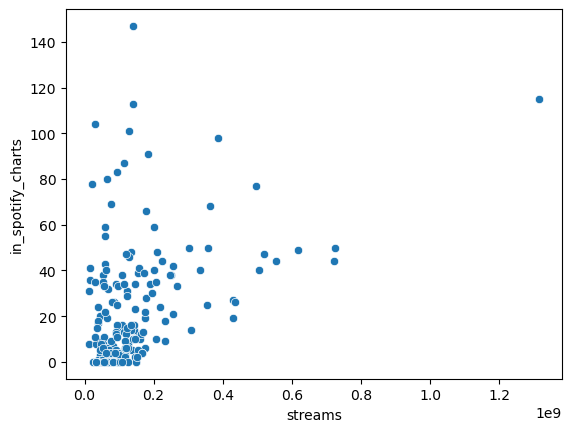

In [23]:
sns.scatterplot(x='streams',y='in_spotify_charts',data=song_2023)

On music platforms, when a new song is released, there is a likelihood that older songs on the charts will drop in position. For instance, on Spotify, if the chart is updated daily, weekly, or monthly, the stream count for a song on a given day determines its chart position. For older songs, the daily stream count is often lower compared to newer releases, even though the total streams for older songs might be higher when summed up.

However, in cases where a song goes viral, it is less likely to experience a significant drop in chart position.

Therefore, there is a correlation between the number of streams and chart position, but the impact is not highly significant.

- Some songs with low streams may top the charts; this is likely due to them being newly released.
- There are songs with a high number of streams, even in the millions, but they have low chart positions. These might be songs that were released a long time ago.
- Newer songs attract more unique listeners and have a higher engagement rate.

It's important to note: The latest data in this dataset is from July 2023.

## 2) Cross Platform Music

In [24]:
song_2023[['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']].corr()

,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts
in_spotify_charts,1.000000,0.714240,0.729599,0.717371
in_apple_charts,0.714240,1.000000,0.466448,0.600617
in_deezer_charts,0.729599,0.466448,1.000000,0.592225
in_shazam_charts,0.717371,0.600617,0.592225,1.000000


As we can see, Spotify and other music platforms exhibit a good correlation. This is because other platforms have charts that are likely similar to Spotify's.

Except for Apple and Deezer music platforms, the correlation they possess is almost a moderately positive correlation. This suggests that the chart positions on Deezer music may be lower compared to Apple Music, or vice versa. Factors such as country and user experience preferences also play a role here. For example, Deezer music might be more widely used compared to Apple Music, or vice versa.

In [25]:
song_2023[['streams','in_apple_charts', 'in_deezer_charts', 'in_shazam_charts']].corr()

,streams,in_apple_charts,in_deezer_charts,in_shazam_charts
streams,1.000000,0.419244,0.595333,0.281792
in_apple_charts,0.419244,1.000000,0.466448,0.600617
in_deezer_charts,0.595333,0.466448,1.000000,0.592225
in_shazam_charts,0.281792,0.600617,0.592225,1.000000


Here, we can observe some interesting occurrences when we consider adding streams:

1. A song with the highest number of streams on Spotify is likely to climb the charts on Spotify. This possibility extends to Deezer Music as well. This also explains the high correlation between Spotify and Deezer. When the charts on Spotify move, it's highly likely that the charts on Deezer Music would exhibit a similar pattern.

2. Songs with a substantial number of streams on Spotify have the potential to achieve high chart positions on Apple Music, although this is not always the case.

3. Shazam charts show a low correlation with song streams on Spotify. This is because Shazam is primarily used as a song identifier from audio, and it is not frequently used by users for streaming music.

These observations highlight the interconnectedness of streaming numbers, chart positions, and the unique characteristics of each platform and recognition service.

## 3) people preference that make a song popular

In [26]:
song_2023[['streams','in_spotify_playlists','bpm','danceability_%','valence_%', 'energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%']].corr()

,streams,in_spotify_playlists,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
streams,1.000000,0.789136,0.105271,0.013107,0.124024,-0.032450,0.063172,-0.004437,-0.115910,0.019309
in_spotify_playlists,0.789136,1.000000,0.063677,-0.005963,0.019067,0.013084,-0.005689,0.052905,-0.110428,0.020489
bpm,0.105271,0.063677,1.000000,-0.054540,0.167757,0.190419,-0.105918,0.013476,-0.062840,-0.039589
danceability_%,0.013107,-0.005963,-0.054540,1.000000,0.330179,0.041837,-0.013716,0.027568,-0.206649,0.280894
valence_%,0.124024,0.019067,0.167757,0.330179,1.000000,0.330955,-0.022178,-0.126410,-0.004677,0.087122
energy_%,-0.032450,0.013084,0.190419,0.041837,0.330955,1.000000,-0.439345,0.031835,0.090970,-0.173373
acousticness_%,0.063172,-0.005689,-0.105918,-0.013716,-0.022178,-0.439345,1.000000,-0.030537,-0.080917,0.089349
instrumentalness_%,-0.004437,0.052905,0.013476,0.027568,-0.126410,0.031835,-0.030537,1.000000,-0.009333,-0.053613
liveness_%,-0.115910,-0.110428,-0.062840,-0.206649,-0.004677,0.090970,-0.080917,-0.009333,1.000000,-0.084212
speechiness_%,0.019309,0.020489,-0.039589,0.280894,0.087122,-0.173373,0.089349,-0.053613,-0.084212,1.000000


valence : emotion produce by song

A high valence value indicates positive emotions, such as happiness, excitement, or cheerfulness, while a low valence value suggests negative emotions, like sadness, melancholy, or anger

1. Streams and In Spotify Playlists (0.789136):

    Explanation: The high positive correlation indicates that songs with more streams are also likely to be included in more playlists on Spotify. This suggests that the popularity of a song (as indicated by the number of streams) often correlates with how frequently the song is included in playlists.

2. Valence (%) and Danceability (%) (0.330955):

    Explanation: The moderately strong positive correlation suggests that the "valence" (happiness) level of a song is correlated with its "danceability" level. In other words, songs with a higher level of happiness tend to be more suitable for dancing.

In [27]:
numerical_cols = spotify.select_dtypes(exclude='object')
numerical_cols = numerical_cols.loc[:, numerical_cols.columns != 'streams']
numerical_cols

,artist_count,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,2,553,147,43,263,45,10,826,125,80,89,83,31,0,8,4
1,1,1474,48,48,126,58,14,382,92,71,61,74,7,0,10,4
2,1,1397,113,94,207,91,14,949,138,51,32,53,17,0,31,6
3,1,7858,100,116,207,125,12,548,170,55,58,72,11,0,11,15
4,1,3133,50,84,133,87,15,425,144,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,1,953,0,61,13,37,1,0,144,60,24,39,57,0,8,3
949,1,1180,0,4,0,8,0,0,166,42,7,24,83,1,12,6
950,2,573,0,2,0,7,0,0,92,80,81,67,4,0,8,6
951,3,1320,0,29,26,17,0,0,97,82,67,77,8,0,12,5


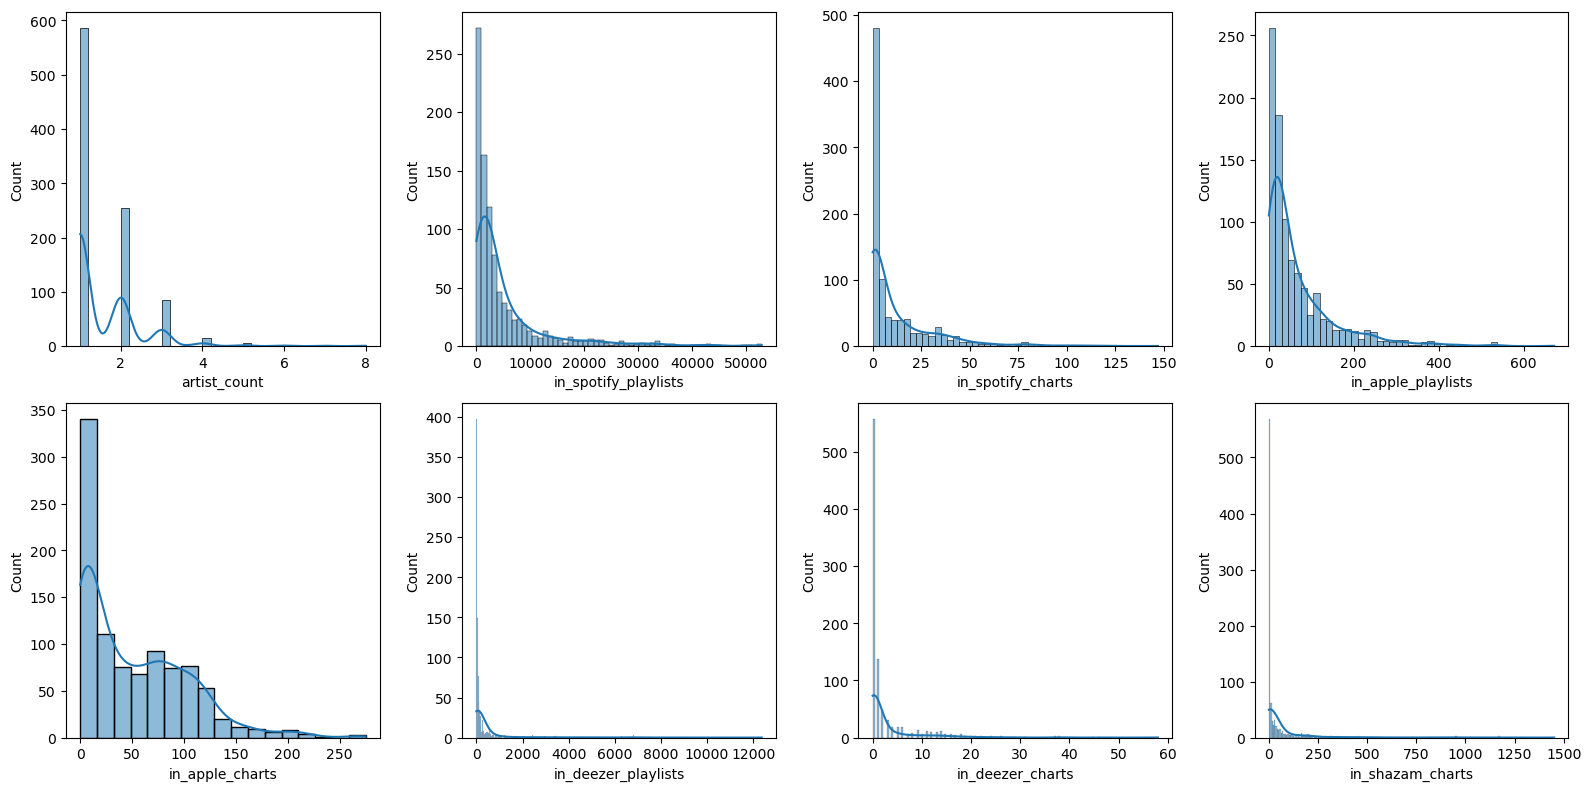

In [28]:
plt.figure(figsize=(16, 8))

# Define the number of rows and columns
num_rows = 2
num_cols = 4

for index, column in enumerate(numerical_cols):
    if index < num_rows * num_cols:
        plt.subplot(num_rows, num_cols, index + 1)
        sns.histplot(data=numerical_cols, x=column, kde=True)


plt.tight_layout(pad=1.0)
plt.show()

# all positive Skewed

# Machine Learning

We will try to used unsupervised learning A.K.A KMeans to cluster which songs are popularity based of preference 

# Song popularity based on preference

### ['streams','bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

In [29]:
features = ['streams','bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

In [30]:
spotify[features]

,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,141381703,125,80,89,83,31,0,8,4
1,133716286,92,71,61,74,7,0,10,4
2,140003974,138,51,32,53,17,0,31,6
3,800840817,170,55,58,72,11,0,11,15
4,303236322,144,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...
948,91473363,144,60,24,39,57,0,8,3
949,121871870,166,42,7,24,83,1,12,6
950,73513683,92,80,81,67,4,0,8,6
951,133895612,97,82,67,77,8,0,12,5


In [31]:
mms = MinMaxScaler()
ss = StandardScaler()

In [32]:
#spotify[['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'liveness_%', 'speechiness_%']] = ss.fit_transform(spotify[['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'liveness_%', 'speechiness_%']])
# Reshape the input for 'instrumentalness_%'
#spotify['instrumentalness_%'] = mms.fit_transform(spotify['instrumentalness_%'].values.reshape(-1, 1))
#data_scaled = spotify[features]

data_scaled = mms.fit_transform(spotify[features])

### The Davies-Bouldin Index (DBI) method is utilized to assess the quality of clustering. A lower DBI value is desirable

In [33]:
result = {}

for i in range(2,50):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(data_scaled)
    db_index = davies_bouldin_score(data_scaled,labels)
    result.update({i: db_index})

result1 = pd.DataFrame(result.values(), index=result.keys(), columns=['Davies-Bouldin Index'])
result1.head(10)

c:\Users\rheza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rheza\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\rheza\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\rheza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\

c:\Users\rheza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rheza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rheza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rheza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rheza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of

,Davies-Bouldin Index
2,1.577054
3,1.760781
4,1.816999
5,1.815051
6,1.790299
7,1.745431
8,1.652669
9,1.680225
10,1.703923
11,1.651404


from davies bouldin index we get 2 optimal cluster for out spotify dataset

we will try second method is elbow Method

c:\Users\rheza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: RuntimeWarning:

algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.



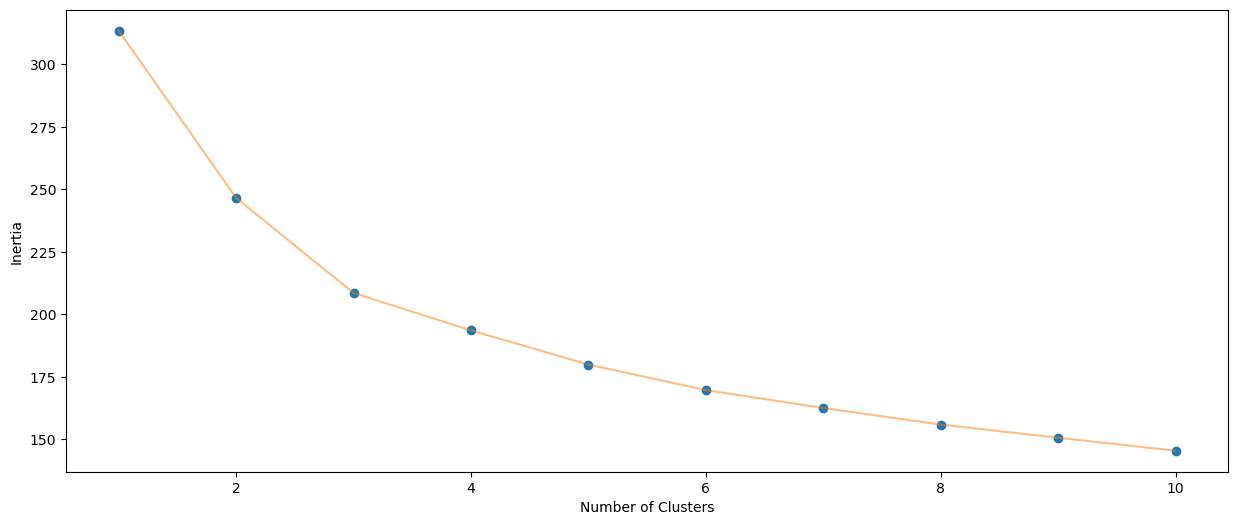

In [34]:
inertia = []

# elbow Method
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(data_scaled)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

As we can see from elbow method we get 3 cluster for our spotify dataset

so we will use 3 cluster

In [35]:
kmeans = KMeans(n_clusters=3, random_state=11)
labels_ = kmeans.fit_predict(data_scaled)

c:\Users\rheza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [36]:
spotify['cluster'] = labels_

C:\Users\rheza\AppData\Local\Temp\ipykernel_6252\1212863158.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
spotify

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cluster
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,1
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,1
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,0
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,0
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,2
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,2
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,1
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,1


In [38]:
spotify.groupby('cluster')[features].mean()

,streams,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
cluster,,,,,,,,,
0,506830709.536932,125.071023,63.176136,33.974432,66.443182,12.400568,2.357955,18.957386,10.352273
1,479163617.386473,122.236715,75.251208,72.041063,71.661836,20.888889,0.543478,18.342995,10.830918
2,605810113.908602,118.494624,55.790323,38.467742,43.725806,68.634409,2.430108,16.521505,8.193548


- Cluster 0 exhibits moderate values across most features
- Cluster 1 stands out with high danceability, valence, and energy
- Cluster 2 has characteristics like high acousticness and lower energy

In [39]:
def clustering(data, col1, col2):
    # Define the unique cluster labels
    unique_clusters = spotify['cluster'].unique()
    # Define colors for each cluster
    colors = ['green', 'yellow', 'red']  # Add more colors as needed
    # Create a scatter plot for each cluster
    plt.figure(figsize=(8, 6))
    for i, cluster_label in enumerate(unique_clusters):
        cluster_df = spotify[spotify['cluster'] == cluster_label]
        plt.scatter(cluster_df[col1], cluster_df[col2], color=colors[i], label=f'Cluster {cluster_label}')

    # Add labels and legend
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend()

    # Set the plot title using an f-string
    plt.title(f'How {col1} and {col2} Affect Songs Popularity')

    # Show the plot after all clusters have been plotted
    plt.show()

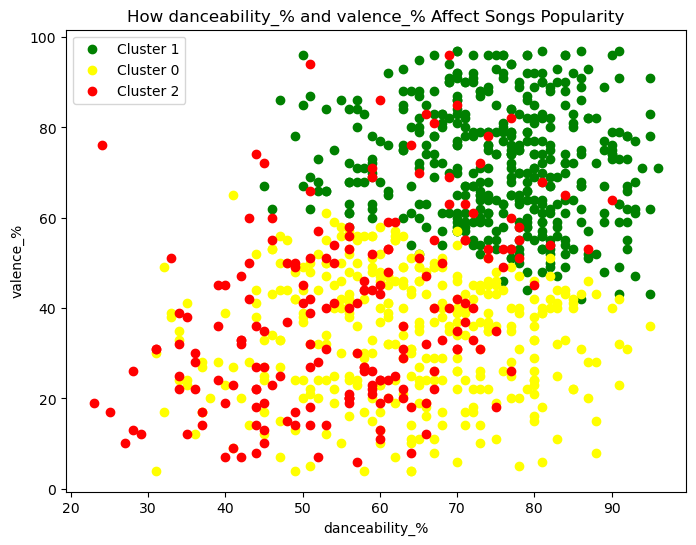

In [40]:

clustering(spotify, 'danceability_%','valence_%')

Cluster Group 0, which receives a moderate number of streams, has a range of danceable songs but tends to be less emotionally positive.

In [41]:
select_cols = ['artist(s)_name', 'track_name', 'streams', 'cluster']
clustergroup = spotify[select_cols].sort_values(by='streams', ascending=False)
clustergroup[clustergroup['cluster']==0].head(20)

,artist(s)_name,track_name,streams,cluster
55,The Weeknd,Blinding Lights,3703895074,0
162,"Drake, WizKid, Kyla",One Dance,2713922350,0
84,"Justin Bieber, The Kid Laroi",STAY (with Justin Bieber),2665343922,0
48,"The Weeknd, Daft Punk",Starboy,2565529693,0
138,Ed Sheeran,Perfect,2559529074,0
127,Harry Styles,Watermelon Sugar,2322580122,0
73,The Neighbourhood,Sweater Weather,2282771485,0
724,"The Chainsmokers, Coldplay",Something Just Like This,2204080728,0
157,OneRepublic,Counting Stars,2011464183,0
325,The Weeknd,The Hills,1947371785,0


Cluster Group 1, songs tend to be more danceable and convey positive emotions.

In [42]:
clustergroup[clustergroup['cluster']==1].head(20)

,artist(s)_name,track_name,streams,cluster
179,Ed Sheeran,Shape of You,3562543890,1
41,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,2808096550,1
140,Imagine Dragons,Believer,2594040133,1
725,"The Chainsmokers, Halsey",Closer,2591224264,1
14,Harry Styles,As It Was,2513188493,1
693,"Shawn Mendes, Camila Cabello",Seï¿½ï¿½o,2484812918,1
407,Dua Lipa,Don't Start Now,2303033973,1
187,Post Malone,Circles,2132335812,1
720,Avicii,Wake Me Up - Radio Edit,1970673297,1
126,"Ray Dalton, Ryan Lewis, Macklemore",Can't Hold Us (feat. Ray Dalton),1953533826,1


Cluster Group 2, which features the most popular songs, there is more diversity, but the majority of songs have lower danceability and valence, indicating a preference for slower, more emotional tracks among listeners.

In [43]:
clustergroup[clustergroup['cluster']==2].head(20)

,artist(s)_name,track_name,streams,cluster
86,Lewis Capaldi,Someone You Loved,2887241814,2
620,Tones and I,Dance Monkey,2864791672,2
71,Glass Animals,Heat Waves,2557975762,2
324,James Arthur,Say You Won't Let Go,2420461338,2
128,"Billie Eilish, Khalid",lovely - Bonus Track,2355719893,2
621,Juice WRLD,Lucid Dreams,2288695111,2
685,Ed Sheeran,Thinking Out Loud,2280566092,2
761,Ed Sheeran,Photograph,2236667932,2
717,Queen,Bohemian Rhapsody - Remastered 2011,2197010679,2
634,"Lady Gaga, Bradley Cooper",Shallow,2159346687,2


Mengetahui karakteristik masing-masing cluster dalam konteks lagu-lagu tersebut dapat memberikan sejumlah manfaat, terutama untuk para pelaku dalam industri musik dan pemasaran:

1. Segmentasi Audiens:
Dengan mengetahui bahwa Cluster 1 memiliki danceability, valence, dan energy yang tinggi, Anda dapat menyusun kampanye pemasaran atau promosi yang lebih terfokus untuk menarik audiens yang cenderung menyukai lagu-lagu dengan karakteristik tersebut.

2. Strategi Pemutaran Playlist:
Pemilik playlist atau layanan streaming dapat menggunakan informasi ini untuk menyusun playlist yang sesuai dengan preferensi pendengar. Misalnya, Cluster 1 dapat digabungkan dalam playlist yang dirancang untuk meningkatkan energi dan suasana ceria.

3. Penempatan Lagu dalam Proyek atau Kampanye Tertentu:
Produser, sutradara, atau pemasar yang mencari lagu untuk proyek atau kampanye tertentu dapat menggunakan wawasan ini untuk memilih lagu yang sesuai dengan mood atau nuansa yang diinginkan.

4. Penyesuaian Strategi Pemasaran:
Label musik atau tim pemasaran dapat menyesuaikan strategi mereka berdasarkan karakteristik setiap cluster. Misalnya, untuk lagu-lagu dalam Cluster 0 dengan nilai moderat, strategi pemasaran mungkin fokus pada peningkatan visibilitas dan popularitas.

In [44]:
# Song Popularity based on Chart Performance on Different Platform